In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

(200, 1)
(200, 2)
[0 0 0 ..., 1 1 1]


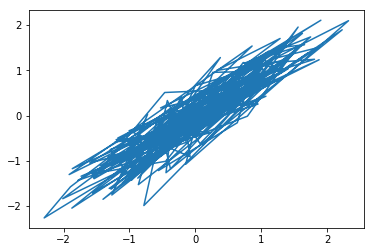

200


In [3]:
print(y.shape)
print(x.shape)
print(gender)

plt.figure()
plt.plot(x[:,0], x[:,1])
plt.show()


Use `least_squares` to compute w, and visualize the results.

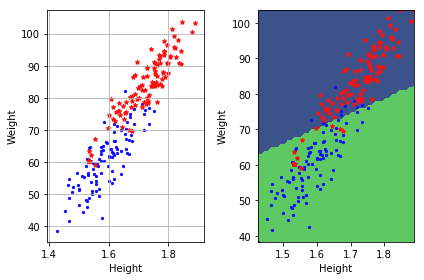

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):

    # add an offset
    tx = np.c_[np.ones((y.shape[0], 1)), x]

    # linear regression
    wls = least_squares(y, tx)

    # visualisation
    visualization(y, x, mean_x, std_x, wls, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [5]:
def sigmoid(t):
    """apply sigmoid function on t."""
    
    return np.exp(t)/(np.exp(t)+1)

In [6]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""

    loss = 1
    for i in range(1,y.shape[0]):
        loss = loss + y[i]*np.log10(sigmoid(tx[i,:].T.dot(w))) + (1-y[i])*np.log10(1-sigmoid(tx[i,:].T.dot(w)))                     
    
    return loss

In [8]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""

    grad = tx.T.dot(sigmoid(tx.dot(w))-y)
    
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [9]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """

    # compute the cost
    loss = calculate_loss(y, tx, w)
    
    # compute the gradient
    grad = calculate_gradient(y, tx, w)
 
    # update w
    w = w - gamma*grad
    
    return loss, w

Demo!

Current iteration=0, loss=[-58.90496914]
Current iteration=100, loss=[-17.84887102]
Current iteration=200, loss=[-17.01597356]
Current iteration=300, loss=[-16.82247176]
Current iteration=400, loss=[-16.76491707]
Current iteration=500, loss=[-16.74581803]
Current iteration=600, loss=[-16.73913135]
Current iteration=700, loss=[-16.73673299]
Current iteration=800, loss=[-16.73586915]
Current iteration=900, loss=[-16.73556266]
Current iteration=1000, loss=[-16.73545845]
Current iteration=1100, loss=[-16.73542635]
Current iteration=1200, loss=[-16.73541885]
loss=[-16.73541854]


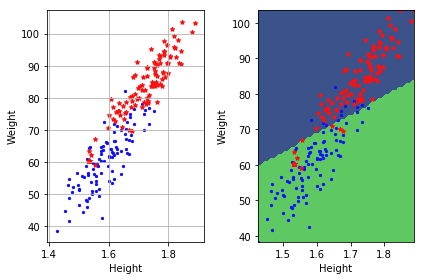

In [10]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [11]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    
    # diagonal matrix S
    S = np.zeros((y.shape[0],y.shape[0]))
    for i in range(1, y.shape[0]):
        S[i,i] = sigmoid(tx[i,:].T.dot(w))*(1-sigmoid(tx[i,:].T.dot(w)))
    
    # hessian
    H = tx.T.dot(S).dot(tx)
    
    return H

Write a function below to return loss, gradient, and hessian.

In [12]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)

    return loss, gradient, hessian


### Using Newton's method
Use Newton's method for logistic regression.

In [13]:
def learning_by_newton_method(y, tx, w, lambda_):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """

    # return loss, gradient and hessian: TODO
    loss, gradient, hessian = logistic_regression(y, tx, w)

    # update w
    w = w -lambda_*np.linalg.inv(hessian).dot(gradient)
    
    return loss, w

demo

Current iteration=0, the loss=[-58.90496914]
Current iteration=1, the loss=[-53.56673296]
Current iteration=2, the loss=[-49.17854495]
Current iteration=3, the loss=[-45.48049204]
Current iteration=4, the loss=[-42.30706059]
Current iteration=5, the loss=[-39.54678915]
Current iteration=6, the loss=[-37.12121062]
Current iteration=7, the loss=[-34.97303395]
Current iteration=8, the loss=[-33.05912661]
Current iteration=9, the loss=[-31.3461533]
Current iteration=10, the loss=[-29.80775976]
Current iteration=11, the loss=[-28.4226933]
Current iteration=12, the loss=[-27.17351104]
Current iteration=13, the loss=[-26.04566876]
Current iteration=14, the loss=[-25.02686293]
Current iteration=15, the loss=[-24.10654582]
Current iteration=16, the loss=[-23.27556185]
Current iteration=17, the loss=[-22.52587101]
Current iteration=18, the loss=[-21.85033603]
Current iteration=19, the loss=[-21.24255756]
Current iteration=20, the loss=[-20.69674578]
Current iteration=21, the loss=[-20.20762027]


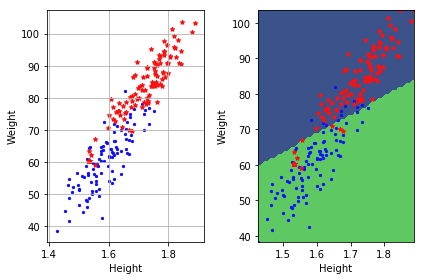

In [14]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, lambda_)
        
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [24]:
def penalized_logistic_regression(y, tx, w, gamma):
    """return the loss, gradient, and hessian."""

    # loss, gradient, and hessian
    loss = calculate_loss(y, tx, w) + gamma*w.T.dot(w)
    gradient = calculate_gradient(y, tx, w) + 2*gamma*w
    hessian = calculate_hessian(y, tx, w) + 2*gamma
    
    return loss, gradient, hessian

In [26]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    
    # loss and gradient
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, gamma)
    
    # update w
    w = w - lambda_*gradient
    
    return loss, w

Current iteration=0, loss=[[-58.90496914]]
Current iteration=100, loss=[[-13.610336]]
Current iteration=200, loss=[[-13.610336]]
Current iteration=300, loss=[[-13.610336]]
Current iteration=400, loss=[[-13.610336]]
Current iteration=500, loss=[[-13.610336]]
Current iteration=600, loss=[[-13.610336]]
Current iteration=700, loss=[[-13.610336]]
Current iteration=800, loss=[[-13.610336]]
Current iteration=900, loss=[[-13.610336]]
loss=[-24.61717173]


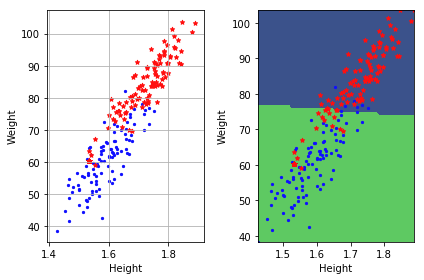

In [32]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 1000
    gamma = 1
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)